In [3]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

#多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

#残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [5]:
#十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
#加上正太分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]


def fitting(M=0):
    """
    M为多项式的次数
    """
    #随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    #最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])
    
    #可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [0.01507192]


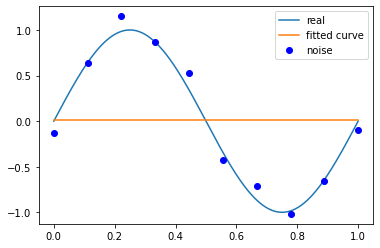

In [7]:
#M=0
p_lsq_0 = fitting(M=0)

Fitting Parameters: [-1.37414632  0.70214508]


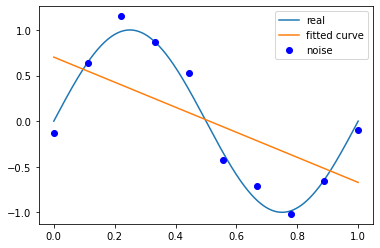

In [9]:
#M=1
p_lsq_1 = fitting(M=1)

Fitting Parameters: [ 22.08322005 -33.85907426  11.92844903  -0.17000241]


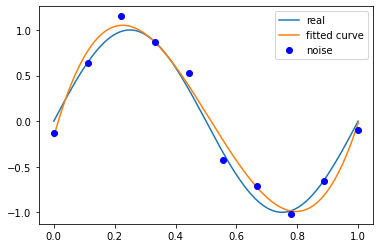

In [10]:
#M=3
p_lsq_3 = fitting(M=3)

Fitting Parameters: [-5.85616868e+04  2.63229053e+05 -4.97058570e+05  5.12174405e+05
 -3.12874418e+05  1.15086347e+05 -2.46233527e+04  2.73968998e+03
 -1.11425460e+02 -1.34104201e-01]


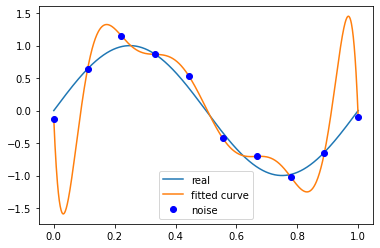

In [11]:
#M=9
p_lsq_9 = fitting(M=9)

# 正则化
结果显示过拟合，引入正则化项（regularizer），降低过拟合


In [12]:
regularization = 0.0001



def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret,
                   np.sqrt(0.5*regularization*np.square(p)))
    return ret

In [13]:
#最小二乘法 加正则化项
p_init = np.random.rand(10)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))

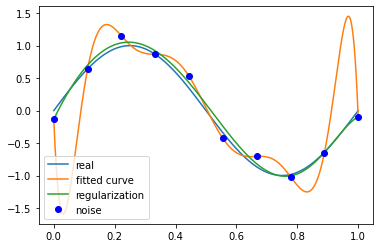

In [16]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()